# Tobig's 14기 6주차 Neural Network Assignment2
### Made by 이지용

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## 데이터 불러오기

학습에 쓰일 데이터는 keras의 cifar-10 데이터입니다.  
32x32 이미지에 색상을 rgb 3가지로 분류한 데이터로 총 3072 차원입니다.  
이 이미지를 10가지 카테고리로 분류했습니다.  
https://www.cs.toronto.edu/~kriz/cifar.html

In [3]:
x_train = np.load("./x_train_data.npy")
y_train = np.load("./y_train_data.npy")
x_test = np.load("./x_test_data.npy")
y_test = np.load("./y_test_data.npy")

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5000, 3072), (5000,), (1000, 3072), (1000,))

    기본적으로 사용할 데이터셋과 패키지들을 설정해둡니다. 일반적으로 데이터셋이 하나라면 train과 test를 split하는 과정이 필요하지만 여기서는 이미 나눠진 데이터들이므로 이 과정은 생략합니다.

## 활성화 함수 클래스

신경망에 사용될 함수들을 정의합니다.

### Activation Functions

In [60]:
class sigmoid :
    # sigmoid 함수입니다.
    def forward(z) :
        c = np.max(z)/2
        return np.exp(c)/(np.exp(c)+np.exp(-z+c))
    
    # sigmoid 함수의 미분을 작성하세요
    def backward(a) :
        return a*(1-a)

    첫 번째로 sigmoid 함수에 대해서 class를 만듭니다. 우리가 앞서 과제 1에서 했던 과정을 코드로 나타내면 됩니다. forward의 경우, 우리가 알던 모습과는 약간 다른 모습의 함수입니다. 그러나 이는 분자,분모에 모두 e^(-c)를 곱해주면 우리가 알던 모습으로 나오게 됩니다. sigmoid 함수의 미분값은 sigmoid(1-sigmoid)이므로 backward의 return값은 위와 같이 만듭니다.

In [52]:
z = np.array([-1,2,3])

In [54]:
sigmoid.forward(z)

array([0.26894142, 0.88079708, 0.95257413])

In [61]:
sigmoid.backward(z)

array([-2, -2, -6])

In [39]:
class relu :
    # relu 함수를 작성하세요
    def forward(z) :
        return np.maximum(0,z)
    
    # relu 함수의 미분을 작성하세요
    def backward(a) :
        return np.where(a>0,1,0)

    relu 함수의 class는 위의 sigmoid보다 간단합니다. z > 0 일 땐, z 값이 나와야하고, z < 0 일 땐, 0이 나와야 합니다. 이는 간단하게 np.max함수를 사용하면 됩니다. 그리고 미분값의 경우, 0 혹은 1의 값이 나와야 합니다. 이는 np.where 함수를 사용하면 됩니다. 안의 요소의 경우, 첫 번째는 기준을, 두 번째는 기준에 부합할 때 받는 값을, 세 번째는 기준에 부합하지 않을 때 받는 값을 의미합니다.

In [34]:
relu.forward(z)

array([0, 2, 3])

In [40]:
relu.backward(z)

array([0, 1, 1])

### Output Activation Function

softmax는 overflow 문제와 차원 문제 때문에 작성해두었습니다.
이 부분은 softmax overflow문제에 대해 검색해보세요.

In [41]:
class softmax :
    def forward(z) :
        y = []
        for zi in z :
            #print("z", z[0])
            c = np.max(zi)
            exp_zi = np.exp(zi-c)
            sum_exp_zi = np.sum(exp_zi)
            yi = exp_zi / sum_exp_zi
            y.append(yi)
            #print("y", y[0])
        #print(y[0])
        return np.array(y)
    
    def backward(p, y) :
        dp = p.copy()
        for dpi, yi in zip(dp, y):
            for k in range(dp.shape[1]):
                if k == yi :
                    dpi[k] -= 1
        return dp

    이제 softmax 함수의 class를 만들어줍니다. softmax의 경우 overflow문제를 야기할 수 있습니다. softmax의 경우, 지수함수를 사용하기 때문에 z의 값이 너무 크면 도출되는 값이 기하급수적으로 커저 컴퓨터가 연산을 못하는 경우가 발생할 수 있습니다. 이 문제가 overflow문제입니다. 이를 방지하기 위해서 zi중 가장 큰 값인 c값을 설정해줍니다. 그리고 zi-c를 빼고 연산해줌으로써 값의 기하급수적 상승을 막습니다.

In [42]:
z = np.array([[np.log(1), np.log(3), np.log(4)]])
p = np.array([[0.125, 0.375, 0.5]])
y = np.array([2])

In [43]:
softmax.forward(z)

array([[0.125, 0.375, 0.5  ]])

In [44]:
softmax.backward(p, y)

array([[ 0.125,  0.375, -0.5  ]])

### Loss Functions

In [47]:
def cross_entropy(p, y) :
    # cross entropy 함수를 작성하세요
    loss = []
    for pi, yi in zip(p, y) :
        for k in range(p.shape[1]) :
            if k == yi :
                loss.append(-np.log(pi[k]+1e-8)) # 1e-8은 무한대로 발산하는 경우를 방지하기 위해 존재합니다
    return loss

    마지막으로 output과 실제 y값과의 차이를 구분해주는 loss function 함수를 만들어줍니다. 여기서는 cross entropy를 사용했습니다. 다른 여타 함수들도 존재하지만 데이터가 범주형이고 10가지로 구분해야하므로 cross entropy를 사용해야합니다.

In [50]:
cross_entropy(p ,y)

[0.6931471605599454]

## 레이어 클래스

각 레이어의 크기와 형태를 입력값과 출력값에 따라 정의합니다.

In [62]:
class Layer:
    def __init__(self, input_size, output_size, std=1e-4) :
        self.input_size = input_size
        self.output_size = output_size
        self.bias = np.random.randn(self.output_size)
        self.weight = np.random.randn(self.input_size, self.output_size)*std # std는 가중치 초기화에서 표준편차를 줄이기 위해 존재합니다.

    이제 NN에서 중요한 layer를 만들어 줍니다. layer의 경우 input_size와 output_size를 설정해주고, bias와 wieght를 만들어줘야합니다. bias의 경우, 모든 output_size에 더해저야 하므로 output size 만큼 만들어줍니다. weight의 경우, input_size와 output_size를 모두 연결해줘야 하므로 행렬 형식으로 모두 만족하게끔 만들어줍니다. 그리고 초기 값은 무작위로 설정하여야 하므로 random.randn을 사용합니다.

## 뉴럴넷 클래스

각 메소드와 변수들의 역할을 주석에 달아주세요 

    여기서부턴 쉬운 이해를 위해 마크다운이 아닌 주석처리하겠습니다.

In [213]:
class CustomNet:
    # CustomNet을 선언할 때 생성되는 값들입니다.
    def __init__(self, lr=0.0001, epoch=500, batch_size=200) :
        self.lr = lr   # lr은 learning rate를 의미합니다.
        self.epoch = epoch   # 전체 데이터를 학습하는데 사용하는 횟수를 의미합니다.
        self.batch_size = batch_size   # 한번에 처리할 때, 들어가는 sample의 수를 의미합니다.
        self.loss_function = cross_entropy # mse로 대체 가능하지만 이번 과제는 분류이므로 cross_entropy로 넣었어요.
        self.layers = []
        self.activations = [softmax]   # 최종적으로 softmax를 사용하기 때문에 넣어둡니다. 더 자세한 설명은 뒤에서 진행할게요.
        self.nodes = []
    
    # Layer를 추가할 때 호출합니다.
    def addLayer(self, Layer) :
        self.layers.append(Layer)
        if not self.nodes :
            self.nodes.append(np.zeros(Layer.input_size))
        self.nodes.append(np.zeros(Layer.output_size))
    # 은닉층에 사용할 Layer들을 추가해줍니다. 
    # 셀프 노드에 값이 없다면 input 사이즈만큼, 셀프 노드에 값이 있다면 ouput 사이즈만큼 셀프 노드를 추가해줍니다.
    
    
    # Activation Function을 추가할 때 호출합니다.
    def addActivation(self, Activation):
        tmp = self.activations.pop()
        self.activations.append(Activation)
        self.activations.append(tmp)
    # Activation Function을 추가해줄 때, 유의해야할 점은 softmax가 항상 마지막에 와야한다는 점입니다.
    # 그렇기 때문에 pop함수를 써서 tmp로 받아주고 이를 제일 마지막에 append 해주어야 합니다.
    
    # 순전파 함수
    def _forward(self, X) :
        self.nodes[0] = X.copy()
        output = X.copy()
        for i in range(len(self.layers)):
            Layer = self.layers[i]
            Activation = self.activations[i]
            output = np.dot(output, Layer.weight)
            output = output + Layer.bias
            output = Activation.forward(output)
            Layer.output = output
            self.nodes[i+1] = output
        return output   
    # 들어온 데이터를 각각 받아줍니다. for문을 돌려 함수에 넣어 값을 도출하는 것까지 진행합니다.
    # 우선 해당 레이어 및 함수를 받아줍니다. 그리고 들어온 데이터에 가중치를 곱해주고 편향을 더해서 새롭게 output을 갱신합니다.
    # 갱신된 output을 함수에 넣어 결과값을 도출하고 셀프 노드에 넣어줍니다.
    
    
    # 역전파 함수
    def _backward(self, X, output, y) :
        for i in reversed(range(len(self.layers))):
            a = self.nodes[i+1]
            Layer = self.layers[i]
            Activation = self.activations[i]
            if i+1 == len(self.layers):
                error = Activation.backward(output, y)
            else :
                error *= Activation.backward(a)
            Layer.weight -= np.dot(error.T, self.nodes[i]).T*self.lr/X.shape[0]
            Layer.bias -= error.sum(axis=0)*self.lr/X.shape[0]
            error = np.dot(error, Layer.weight.T)
    # 역전파의 경우, 거꾸로 진행해야하기 때문에 reversed를 꼭 진행해야합니다.
    # 해당 레이어와 사용했던 함수를 받아줍니다.
    # if문을 돌려 가장 마지막 layer라면 error를 위의 방식으로 아니라면 else 방식으로 error를 구해줍니다.
    # 각각의 weight와 bias를 업데이트 해줍니다. 
    # 마지막으로 첫 연산 이후에 계속해서 사용해줄 error를 업데이트 해줍니다.
    
    
    # Accrucy를 반환합니다.
    def _accuracy(self, output, y) :
        pre_p = np.argmax(output, axis=1)
        return np.sum(pre_p==y)/y.shape[0]
    # output 중 가장 큰 값의 위치를 도출합니다.
    # 이 값이 y값과 같은지 확인하고 이를 모두 더해줍니다. 그리고 전체 데이터 수로 나눔으로써 accuracy를 도출합니다.
    
    # 데이터셋에 모델을 fit할때 호출합니다.
    def fit(self, X, y, val_X, val_y):
        history = {'val_acc': [],'val_loss': []}
        N = X.shape[0]
        for i in range(self.epoch) :
            for j in range(N//self.batch_size) :
                batch_mask = np.random.choice(N, self.batch_size)
                X_batch = X[batch_mask]
                y_batch = y[batch_mask]
                output = self._forward(X_batch)
                loss = self.loss_function(output, y_batch)
                self._backward(X_batch, output, y_batch)
            
            #accuracy와 loss를 기록해둡시다.
            output = self._forward(val_X)
            history["val_acc"].append(self._accuracy(output, val_y))
            history["val_loss"].append(sum(self.loss_function(output, val_y)))
            
            #중간중간 기록을 찍어볼 때 사용. 적절히 조절해 쓰세요.
            if i % 50 == 0:
                print(i, "test accuracy :", history["val_acc"][-1])
                print(i, "test loss     :", history["val_loss"][-1])
        return history
    # 위와 같은 과정을 통해 학습시킵니다.

    이제 본격적으로 학습시키겠습니다. 우선 저희에게 주어졌던 기존 파라미터를 조금씩 바꿔보겠습니다. batch_size를 조절해보겠습니다. 아래의 nn모델은 기존보다 batch size를 줄인 것입니다. 

In [224]:
# 하이퍼 파라미터를 적절히 조절해 뉴럴넷을 선언하세요
nn = CustomNet(lr=0.0005, epoch=60, batch_size=100)

# 원하는 만큼 층과 활성화 함수를 쌓아 주세요. 기본적으로 2Layer를 예시로 적어드립니다.
nn.addLayer(Layer(3072,1000))
nn.addActivation(sigmoid)
nn.addLayer(Layer(1000,10))

In [225]:
for layer in nn.layers:
    print(layer.weight.shape, layer.bias.shape)

(3072, 1000) (1000,)
(1000, 10) (10,)


In [226]:
history = nn.fit(x_train, y_train, x_test, y_test)

0 test accuracy : 0.09
0 test loss     : 2343.289562822162
50 test accuracy : 0.379
50 test loss     : 1755.4419084511571


    저희에게 주어진 기존 값보다 accuracy가 높아진 것을 확인할 수 있습니다.

In [227]:
print("Best Validation Accuracy : ",max(history['val_acc']))

Best Validation Accuracy :  0.385


In [228]:
nn1 = CustomNet(lr=0.0005, epoch=60, batch_size=1000)


nn1.addLayer(Layer(3072,1000))
nn1.addActivation(sigmoid)
nn1.addLayer(Layer(1000,10))

In [229]:
history = nn1.fit(x_train, y_train, x_test, y_test)

0 test accuracy : 0.103
0 test loss     : 2824.7300919516583
50 test accuracy : 0.197
50 test loss     : 2136.7076250174514


In [230]:
print("Best Validation Accuracy : ",max(history['val_acc']))

Best Validation Accuracy :  0.212


     반면 batch size를 늘리니 accuracy가 현저히 줄어든 것을 확인할 수 있습니다.

In [231]:
nn2 = CustomNet(lr=0.0005, epoch=80, batch_size=500)

nn2.addLayer(Layer(3072,1000))
nn2.addActivation(sigmoid)
nn2.addLayer(Layer(1000,10))

In [232]:
history = nn1.fit(x_train, y_train, x_test, y_test)
print("Best Validation Accuracy : ",max(history['val_acc']))

0 test accuracy : 0.21
0 test loss     : 2115.2245133313463
50 test accuracy : 0.289
50 test loss     : 2021.6773398869755
Best Validation Accuracy :  0.297


    이번엔 epoch size를 조절해보겠습니다. epoch size를 늘리니 미약하게 accuary가 늘어간 것을 확인할 수 있었습니다. 반면 아래의 모델은 epoch size를 줄인 것입니다. 역시 학습이 몇 번 안되니 accuracy가 확연하게 줄어든 것을 파악할 수 있었습니다.

In [237]:
nn3 = CustomNet(lr=0.0005, epoch=10, batch_size=500)

nn3.addLayer(Layer(3072,1000))
nn3.addActivation(sigmoid)
nn3.addLayer(Layer(1000,10))

In [240]:
history = nn3.fit(x_train, y_train, x_test, y_test)
print("Best Validation Accuracy : ",max(history['val_acc']))

0 test accuracy : 0.112
0 test loss     : 2677.207755222694
Best Validation Accuracy :  0.185


    최종적으로 모델을 한번 만들어보겠습니다.

In [248]:
nn4 = CustomNet(lr=0.0005, epoch=80, batch_size=100)

nn4.addLayer(Layer(3072,1000))
nn4.addActivation(sigmoid)
nn4.addLayer(Layer(1000,10))

In [249]:
history = nn4.fit(x_train, y_train, x_test, y_test)
print("Best Validation Accuracy : ",max(history['val_acc']))

0 test accuracy : 0.102
0 test loss     : 2385.864878232193
50 test accuracy : 0.372
50 test loss     : 1757.3629793608532
Best Validation Accuracy :  0.384


    layer를 늘려도 보고, batch size나 epoch를 조절해봤습니다. 이런 저런 방법을 사용해봤으나 눈에 확 띄는 결과는 없었고, 확연히 accuracy가 줄어드는 현상이 발생했습니다. 그 중 가장 높은 것이 위와 같은 모델이었습니다.

## Accuracy 그래프 그리기

학습한 결과를 그래프로 찍어보세요. 가장 높은 Best Validation Accuracy를 찍은 분께 상품을 드립니다!

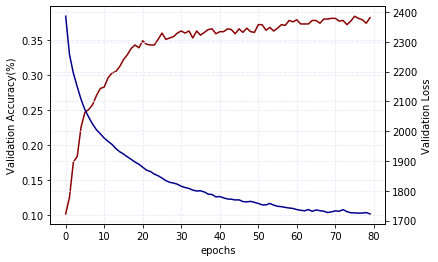

Best Validation Accuracy :  0.384


In [250]:
fig = plt.figure()
ax_acc = fig.add_subplot(111)

# 에포크 숫자만큼 range(epoch)를 변경해주셔야 합니다~
ax_acc.plot(range(80), history['val_acc'], label='정확도(%)', color='darkred')
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(80), history['val_loss'], label='오차', color='darkblue')
plt.ylabel('Validation Loss')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

# 그래프 표시
plt.show()

# 최고 validation accuracy는?
print("Best Validation Accuracy : ",max(history['val_acc']))

    처음 예시로 줬던 것보다 약 10퍼센트 accuracy가 증가했습니다. 그러나 epoch가 늘어나면 늘어날수록 그래프가 불안정한 모습이 보이네요.